# Supervised learning
* regression
    * predict a real number assoc with a feature vectore
* classification
    * predict a discrete value (label) assoc with a feature vector

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#plt.style.use('classic')
#plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
def minkowskiDist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

# 1 = manhattan
#2 ==ucladean

In [4]:
#Get the animals

class Animal(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = np.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other): #distance between objects
        """Assumes other an Animal
           Returns the Euclidean distance between feature vectors
              of self and other"""
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)
                             
    def __str__(self):
        return self.name

In [5]:
#Code to compute distance matrix
def compareAnimals(animals, precision):
    """Assumes animals is a list of animals, precision an int >= 0
       Builds a table of Euclidean distance between each animal"""
    #Get labels for columns and rows
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    #Get distances between pairs of animals
    #For each row
    for a1 in animals:
        row = []
        #For each column
        for a2 in animals:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
    #Produce table
    table = plt.table(rowLabels = rowLabels,
                        colLabels = columnLabels,
                        cellText = tableVals,
                        cellLoc = 'center',
                        colWidths = [0.3]*len(animals),
                        loc = 'center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2.5)
    plt.axis('off')
    plt.savefig('distances')
    plt.show()

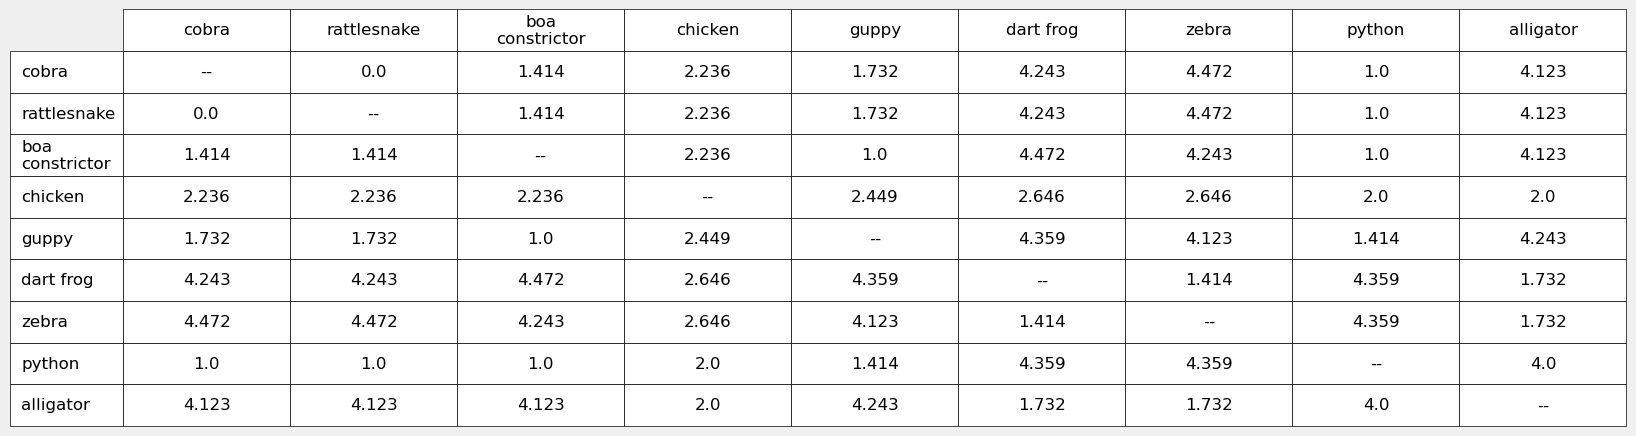

In [6]:
#Get the animals
  
##Actual number of legs
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,2])
alligator = Animal('alligator', [1,1,0,1,4])
dartFrog = Animal('dart frog', [1,0,1,0,4])
zebra = Animal('zebra', [0,0,0,0,4])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])
animals = [cobra, rattlesnake, boa, chicken, guppy,
           dartFrog, zebra, python, alligator]

compareAnimals(animals, 3)

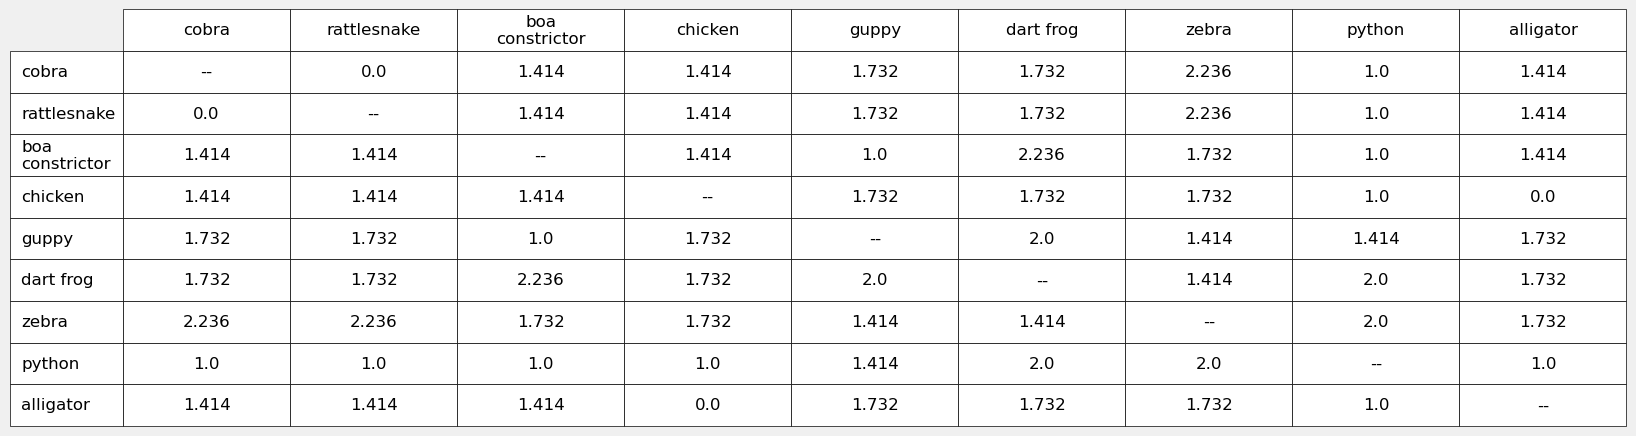

In [7]:
##Binary features only; i.e instead of num of legs; if they\
#have legs or not. allows KNN distance to be more narrow\
# since it compares all easier. smaller dist better       
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,1])
alligator = Animal('alligator', [1,1,0,1,1])
dartFrog = Animal('dart frog', [1,0,1,0,1])
zebra = Animal('zebra', [0,0,0,0,1])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])
animals = [cobra, rattlesnake, boa, chicken, guppy,
           dartFrog, zebra, python, alligator]

compareAnimals(animals,3) # three labels

### Use Distance Matrix for Classification
* Simplest approach is probably nearest neighbor
* Remember training data
* When predicting the label of a new example
* Find the nearest example in the training data
* Predict the label associated with that example

### advantage and dis
* advantages
    * learning fast, no explicit training
    * no theory required
    * easy to explain method and results
* disadvantage
    * memory intensive if large set
    * no model to shed light on process that generated data

### The Titanic Disaster
* RMS Titanic sank in the North Atlantic the morning of 15 April 1912, after colliding with an iceberg. Of the 1300 passengers aboard, 812 died. (703 of 918 crew members died.)
* Database of 1046 passengers
* Cabin class
* 1st, 2nd, 3rd
* Age
* Gender

*each row is a passenger

In [8]:
class Passenger(object):
    featureNames = ('C1', 'C2', 'C3', 'age', 'male gender')
    #c1,2,3 are cabin classes
    #ex. if passenger books 3rd class, c1&2 will be 0 and c3=1
    def __init__(self, pClass, age, gender, survived, name):
        self.name = name
        self.featureVec = [0, 0, 0, age, gender]
        self.featureVec[pClass - 1] = 1
        self.label = survived 
        self.cabinClass = pClass

    def distance(self, other):
        return minkowskiDist(self.featureVec, other.featureVec, 2)
    
    def getClass(self):
        return self.cabinClass
    def getAge(self):
        return self.featureVec[3]
    def getGender(self):
        return self.featureVec[4]
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.featureVec[:] #makes copy of feature vector
    def getLabel(self):
        return self.label

In [9]:
#data in a file is retrieved to a dict      
def getTitanicData(fname):
    data = {}
    data['class'], data['survived'], data['age'] = [], [], []
    data['gender'], data['name'] = [], []
    f = open(fname)
    line = f.readline()
    while line != '':
        split = line.split(',')
        data['class'].append(int(split[0]))
        data['age'].append(float(split[1]))
        if split[2] == 'M':
            data['gender'].append(1)
        else:
            data['gender'].append(0)
        if split[3] == '1':
            data['survived'].append('Survived')
        else:
            data['survived'].append('Died')
        data['name'].append(split[4:])
        line = f.readline()
    return data

In [10]:
def buildTitanicExamples(fileName):
    data = getTitanicData(fileName)
    examples = []
    for i in range(len(data['class'])):
        p = Passenger(data['class'][i], data['age'][i],
                      data['gender'][i], data['survived'][i],
                      data['name'][i])
        examples.append(p)
    print('Finishe processing', len(examples), 'passengers\n')    
    return examples
    
#examples = buildTitanicExamples('TitanicPassengers.txt')

### Is Accuracy Enough?
* If we predict "died", accuracy will be >62% for passengers and >76% for crew members
* Consider a disease that occurs in 0.1% of population
* Predicting disease-free has an accuracy of 0.999

In [11]:
# calculate the accuracy
def accuracy(truePos, falsePos, trueNeg, falseNeg):
    numerator = truePos + trueNeg
    denominator = truePos + trueNeg + falsePos + falseNeg
    return numerator/denominator

### other metrics



In [12]:
def sensitivity(truePos, falseNeg):
    try:
        return truePos/(truePos + falseNeg)
    except ZeroDivisionError:
        return float('nan')
    
def specificity(trueNeg, falsePos):
    try:
        return trueNeg/(trueNeg + falsePos)
    except ZeroDivisionError:
        return float('nan')
    
def posPredVal(truePos, falsePos):
    try:
        return truePos/(truePos + falsePos)
    except ZeroDivisionError:
        return float('nan')
    
def negPredVal(trueNeg, falseNeg):
    try:
        return trueNeg/(trueNeg + falseNeg)
    except ZeroDivisionError:
        return float('nan')

In [13]:
def getStats(truePos, falsePos, trueNeg, falseNeg, toPrint = True):
    accur = accuracy(truePos, falsePos, trueNeg, falseNeg)
    sens = sensitivity(truePos, falseNeg)
    spec = specificity(trueNeg, falsePos)
    ppv = posPredVal(truePos, falsePos)
    if toPrint:
        print(' Accuracy =', round(accur, 3))
        print(' Sensitivity =', round(sens, 3))
        print(' Specificity =', round(spec, 3))
        print(' Pos. Pred. Val. =', round(ppv, 3))
    return (accur, sens, spec, ppv)

### Testing Methodology Matters
* How do we test our classifier?

* Leave-one-out (leaveOneOut)---used when we have small number of examples
    * train on n-1 examples and test on one
    * run multiple times and average the results
* Repeated random sub-sampling (split80_20, randomSplits) ---otherwise
    * 80% for training, 20 for testing

In [14]:
# good for small data set
def leaveOneOut(examples, method, toPrint = True):
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for i in range(len(examples)):
        testCase = examples[i]
        trainingData = examples[0:i] + examples[i+1:]
        results = method(trainingData, [testCase])
        truePos += results[0]
        falsePos += results[1]
        trueNeg += results[2]
        falseNeg += results[3]
    if toPrint:
        getStats(truePos, falsePos, trueNeg, falseNeg)
    return truePos, falsePos, trueNeg, falseNeg

In [15]:
def split80_20(examples):
    sampleIndices = random.sample(range(len(examples)),
                                  len(examples)//5)
    trainingSet, testSet = [], []
    for i in range(len(examples)):
        if i in sampleIndices:
            testSet.append(examples[i])
        else:
            trainingSet.append(examples[i])
    return trainingSet, testSet

In [16]:
# method is a function that could be k-nn or logistic-regression
def randomSplits(examples, method, numSplits, toPrint = True):
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    random.seed(0)# for lecture only
    for t in range(numSplits):
        trainingSet, testSet = split80_20(examples)
        results = method(trainingSet, testSet)
        truePos += results[0]
        falsePos += results[1]
        trueNeg += results[2]
        falseNeg += results[3]
    getStats(truePos/numSplits, falsePos/numSplits,
             trueNeg/numSplits, falseNeg/numSplits, toPrint)
    return truePos/numSplits, falsePos/numSplits,\
             trueNeg/numSplits, falseNeg/numSplits

In [17]:
#Now let's try KNN
# first thing is to find knn for data set
def findKNearest(example, exampleSet, k): #
    # exampleSet = TrainingSet
    kNearest, distances = [], []
    #Build lists containing first k neighbors examples and their distances
    for i in range(k):
        #not comparing, just placing into list
        kNearest.append(exampleSet[i])
        distances.append(example.distance(exampleSet[i]))
    maxDist = max(distances) #Get maximum distance
    #Look at examples not yet considered
    for e in exampleSet[k:]:
        dist = example.distance(e)
        if dist < maxDist: # replace for the better distance
            #replace farther neighbor by this one
            maxIndex = distances.index(maxDist)
            kNearest[maxIndex] = e # replace for better in list
            distances[maxIndex] = dist
            maxDist = max(distances) #update max 
    return kNearest, distances

#could take a while if large set

In [18]:
def KNearestClassify(training, testSet, label, k):
    #training is not necessary for knn, but used to verification
    """Assumes training & testSet lists of examples, k an int
       Predicts whether each example in testSet has label
       Returns number of true positives, false positives,
          true negatives, and false negatives"""
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for testCase in testSet:
        nearest, distances = findKNearest(testCase, training, k)
        #conduct vote: for each new observation, the algorithm counts the number of\
        # neighbors and assigns the new observation to the class with the highest number of votes
        # Ex. k=5: the nearest neighbors of new observation are A,B,B,C,C. it will be assigned\
        # to B since it has the most votes. But in event of a Tie it can either choose\
        # the closer ones since they are 'weighted' more or will choose alphabetically.\
        # could be assigned to C if they were closer together. 
        numMatch = 0
        for i in range(len(nearest)):
            if nearest[i].getLabel() == label:
                numMatch += 1 #how many neighbors 'vote' positive
        if numMatch > k//2: #guess label
            #if greater than half voted positive
            if testCase.getLabel() == label:#if actually positive
                truePos += 1 #KNN correctly identifies a true positive
            else:
                falsePos += 1 #label not actually positive but algorithm thought it was
        else: #guess not label
            if testCase.getLabel() != label:
                trueNeg += 1 # negative class is generally the more common class
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg

In [19]:
examples = buildTitanicExamples('TitanicPassengers.txt')

knn = lambda training, testSet:\
             KNearestClassify(training, testSet,
                              'Survived', 5) # 5 k neighbors. choice of k depends on data
# forces to take 4 args for the two knn lists
numSplits = 10
print('Average of', numSplits,
      '80/20 splits using KNN (k=5)')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(examples, knn, numSplits)

print('Average of LOO testing using KNN (k=5)')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(examples, knn)
    
    #examples is passenger file i don't have
# Based on the output, not much difference between experiments

Finishe processing 1046 passengers

Average of 10 80/20 splits using KNN (k=5)
 Accuracy = 0.746
 Sensitivity = 0.626
 Specificity = 0.833
 Pos. Pred. Val. = 0.73
Average of LOO testing using KNN (k=5)
 Accuracy = 0.756
 Sensitivity = 0.646
 Specificity = 0.832
 Pos. Pred. Val. = 0.726


## logistic regression  

fit(sequence of feature vectors, sequence of labels)
    return object of type Logistic regression

In [20]:
import sklearn.linear_model

def buildModel(examples, toPrint = True):
    featureVecs, labels = [],[]
    for e in examples:
        featureVecs.append(e.getFeatures())
        labels.append(e.getLabel())
    LogisticRegression = sklearn.linear_model.LogisticRegression
    model = LogisticRegression().fit(featureVecs, labels)

    if toPrint:
        print('model.classes_=', model.classes_) #print the labels associated 
        for i in range(len(model.coef_)): # excract the len ofcoef
            print('for label', model.classes_[1])
            for j in range(len(model.coef_[0])): # only interested in teh first since it's a list containing lists
                print(' ', Passenger.featureNames[j], '=', model.coef_[0][j])

    return model


In [21]:
examples = buildTitanicExamples('TitanicPassengers.txt')
buildModel(examples)

Finishe processing 1046 passengers

model.classes_= ['Died' 'Survived']
for label Survived
  C1 = 1.149364742337924
  C2 = -0.0835861505109231
  C3 = -1.0656510723396566
  age = -0.033432939707585894
  male gender = -2.4234365404690834


LogisticRegression()

In [25]:
#apply model
def applyModel(model, testSet, label,prob= 0.5):
    testFeatureVecs= [e.getFeatures() for e in testSet]# every sample has a vecotre
    probs = model.predict_proba(testFeatureVecs)
    print(f'probs {probs}')
    truePos, falsePos, trueNeg, falseNeg = 0,0,0,0 # list of probabilites

    ci= list(model.classes_).index(label)
    for i in range(len(probs)):
        if probs[i][ci] == label:
            if testSet[i].getLabel() == label:
                truePos += 1
            else:
                falsePos += 1
        else:
            if testSet[i].getLabel() != label:
                trueNeg+= 1
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg


In [23]:
# puttingit together

def lr(trainingData, testData, prob= 0.4): # can be a different probability if wanted
    model = buildModel(trainingData, False) # build model on logistic regression
    results = applyModel(model, testData, 'Survived', prob) # then apply model
    return results


In [24]:
# calling the lr
random.seed(0)
numsplits = 10 #repeat

print('average of', numSplits, '80/20 splits LR')
truePos, falsePos, trueNeg, falseNeg = randomSplits(examples, lr, numSplits)

print('Avg of L00 testing using LR')
truePos, falsePos, trueNeg,falseNeg = leaveOneOut(examples, lr)

average of 10 80/20 splits LR
 Accuracy = 0.58
 Sensitivity = 0.0
 Specificity = 1.0
 Pos. Pred. Val. = nan
Avg of L00 testing using LR
 Accuracy = 0.592
 Sensitivity = 0.0
 Specificity = 1.0
 Pos. Pred. Val. = nan
